# GPU Check

In [1]:
#!pip uninstall tensorflow
#!pip uninstall tensorflow-gpu
#!pip install --upgrade --force-reinstall tensorflow-gpu
#!pip install tensorflow
#!pip install tensorflow-directml-plugin
import tensorflow as tf

In [2]:
print('TensorFlow Version: ' + tf.__version__)
!pip show tensorflow

TensorFlow Version: 2.10.0
Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\skyxt\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [3]:
#Verify we got CPU + GPU or only CPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

# Packages and Environmnet

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf


import matplotlib.pyplot as plt
from matplotlib.image import imread
#!pip install opencv-python
import cv2

import os
import warnings
warnings.filterwarnings('ignore')

import sys

#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

sys.path.append('InceptionV3')
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications import VGG16

In [6]:
import time
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

# Run this line above to install basic packages

In [16]:
###### RUN THIS CELL ABOVE ######

# View the data (Simple data with from one material)

In [9]:
# Create a function to see some images 

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images)>3:
            break
    fig=plt.figure(figsize=(10,12))
    xrange=range(1,5)
    
    for img,x in zip(images,xrange):
        ax=fig.add_subplot(2,2,x)
        ax.imshow(img)
        ax.set_title(img.shape)

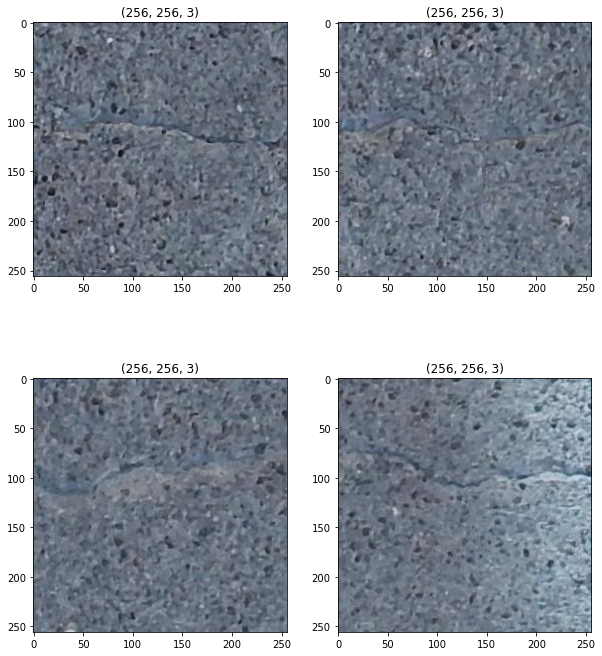

In [10]:
load_images_from_folder("Structural Defects Networks/Cracked")

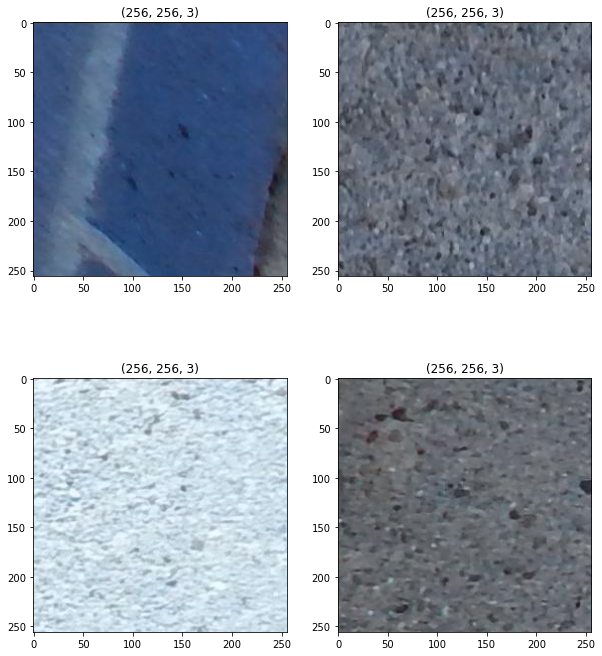

In [11]:
load_images_from_folder("Structural Defects Networks/Non-Cracked")

# Creat Dataset

In [11]:
# For CNN (grey scale images)
labels = ['Cracked', 'Non-Cracked']
img_size = 150
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('Structural Defects Networks')

In [12]:
# For vgg16 (color images)
labels = ['Cracked', 'Non-Cracked']
img_size = 150

def read_images(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('Structural Defects Networks')

<AxesSubplot:ylabel='count'>

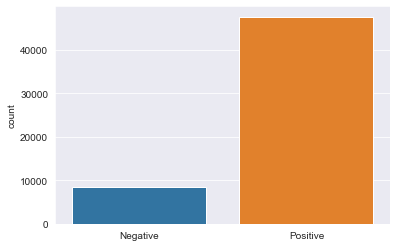

In [8]:
# find out the number of images in each class
l = []
for i in Dataset:
    if(i[1] == 0):
        l.append("Negative")
    else:
        l.append("Positive")
sns.set_style('darkgrid')
sns.countplot(l)

In [14]:
# make x as features and y as labels
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

# Normalize the data
x = np.array(x) / 255
#x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [15]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [16]:
# shape of train and test data
print("Shape of train data: ", x_train.shape)
print("Shape of test data: ", x_test.shape)

Shape of train data:  (44873, 150, 150, 3)
Shape of test data:  (11219, 150, 150, 3)


# Use Convolutional neural networks (CNN)

In [12]:
# create the sequential model
model = Sequential()

model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = (150,150,1)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [19]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1403/1403 [==============================] - 491s 347ms/step - loss: 0.4451 - accuracy: 0.8408 - val_loss: 0.4306 - val_accuracy: 0.8454
Epoch 2/10
1403/1403 [==============================] - 484s 345ms/step - loss: 0.4238 - accuracy: 0.8496 - val_loss: 0.4448 - val_accuracy: 0.8441
Epoch 3/10
1403/1403 [==============================] - 479s 341ms/step - loss: 0.4243 - accuracy: 0.8496 - val_loss: 0.4331 - val_accuracy: 0.8449
Epoch 4/10
1403/1403 [==============================] - 478s 341ms/step - loss: 0.4239 - accuracy: 0.8496 - val_loss: 0.4359 - val_accuracy: 0.8451
Epoch 5/10
1403/1403 [==============================] - 491s 350ms/step - loss: 0.4241 - accuracy: 0.8496 - val_loss: 0.4403 - val_accuracy: 0.8437
Epoch 6/10
1403/1403 [==============================] - 489s 349ms/step - loss: 0.4240 - accuracy: 0.8496 - val_loss: 0.4284 - val_accuracy: 0.8454
Epoch 7/10
1403/1403 [==============================] - 491s 350ms/step - loss: 0.4240 - accuracy: 0.8496 - val_

(0.8, 1.0)

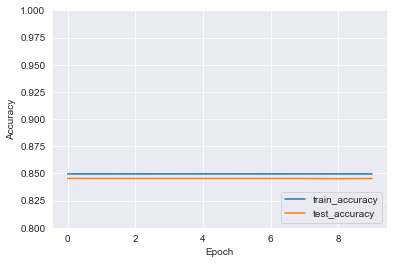

In [35]:
# visualize the model
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# adjust ylabel range to 0.98 to 1
plt.ylim([0.825, 0.860])

In [ ]:
plt.ylim([0.825, 0.860])

In [36]:
# read model.cnn_multi
model = tf.keras.models.load_model('model.cnn_multi')

In [ ]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

# make predictions
y_pred = model.predict(x_test)

In [24]:
# print traing and testing accuracy
print("Training Accuracy: {:.4f}".format(history.history['accuracy'][-1]))
print("Testing Accuracy: {:.4f}".format(test_acc))

Training Accuracy: 0.8496
Testing Accuracy: 0.8454


In [25]:
# save the model
model.save('model.cnn_multi')

INFO:tensorflow:Assets written to: model.cnn_multi\assets


INFO:tensorflow:Assets written to: model.cnn_multi\assets


# Apply data augmentation for x_train (CNN)

In [56]:
# apply data augmentation to x_train
datagen = ImageDataGenerator(
        rotation_range=365,
        zoom_range = 0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [57]:
len(x_train)

44873

In [27]:
# train the model
history = model.fit(datagen.flow(x_train,y_train, batch_size=32),
                                epochs = 10, validation_data = (x_test,y_test),
                                verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/10
1402/1402 [==============================] - 503s 358ms/step - loss: 0.4220 - accuracy: 0.8496 - val_loss: 0.4219 - val_accuracy: 0.8454
Epoch 2/10
1402/1402 [==============================] - 497s 355ms/step - loss: 0.4199 - accuracy: 0.8495 - val_loss: 0.4308 - val_accuracy: 0.8454
Epoch 3/10
1402/1402 [==============================] - 492s 351ms/step - loss: 0.4235 - accuracy: 0.8496 - val_loss: 0.4346 - val_accuracy: 0.8454
Epoch 4/10
1402/1402 [==============================] - 489s 349ms/step - loss: 0.4232 - accuracy: 0.8496 - val_loss: 0.4305 - val_accuracy: 0.8454
Epoch 5/10
1402/1402 [==============================] - 485s 346ms/step - loss: 0.4236 - accuracy: 0.8496 - val_loss: 0.4314 - val_accuracy: 0.8454
Epoch 6/10
1402/1402 [==============================] - 479s 341ms/step - loss: 0.4226 - accuracy: 0.8496 - val_loss: 0.4305 - val_accuracy: 0.8454
Epoch 7/10
1402/1402 [==============================] - 475s 338ms/step - loss: 0.4230 - accuracy: 0.8496 - val_

(0.8, 0.9)

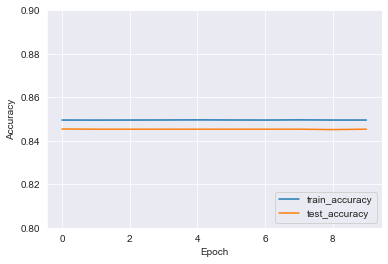

In [42]:
# visualize the model
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.ylim([0.8,0.9])

In [54]:
# read model.cnn_multi
model = tf.keras.models.load_model('model.cnn_multi_aug')

In [32]:
# make predictions
y_pred = model.predict(x_test)

# print traing and testing accuracy
print("Training Accuracy: {:.4f}".format(history.history['accuracy'][-1]))
print("Testing Accuracy: {:.4f}".format(test_acc))

Training Accuracy: 0.8496
Testing Accuracy: 0.8454


In [33]:
# save the model
model.save('model.cnn_multi_aug')

INFO:tensorflow:Assets written to: model.cnn_multi_aug\assets


INFO:tensorflow:Assets written to: model.cnn_multi_aug\assets


# Apply VVG16
https://www.kaggle.com/datasets/keras/vgg16

In [58]:
from tensorflow.keras.applications import VGG16

weights_file='VGG16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights =None)

pretrained_model.load_weights(weights_file)

for layer in pretrained_model.layers:
     layer.trainable = False

pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [59]:
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [60]:
# shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(44873, 150, 150, 3)
(11219, 150, 150, 3)


In [62]:
# apply vgg16 to x_train
history = model_vgg.fit(datagen.flow(x_train,y_train, batch_size=32),
                                epochs = 15, validation_data = (x_test,y_test),
                                verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/15
1402/1402 [==============================] - 407s 290ms/step - loss: 0.3469 - accuracy: 0.8793 - val_loss: 0.3279 - val_accuracy: 0.8792
Epoch 2/15
1402/1402 [==============================] - 352s 251ms/step - loss: 0.3400 - accuracy: 0.8817 - val_loss: 0.3390 - val_accuracy: 0.8799
Epoch 3/15
1402/1402 [==============================] - 352s 251ms/step - loss: 0.3379 - accuracy: 0.8831 - val_loss: 0.3618 - val_accuracy: 0.8794
Epoch 4/15
1402/1402 [==============================] - 339s 242ms/step - loss: 0.3352 - accuracy: 0.8847 - val_loss: 0.3260 - val_accuracy: 0.8823
Epoch 5/15
1402/1402 [==============================] - 355s 253ms/step - loss: 0.3344 - accuracy: 0.8855 - val_loss: 0.3200 - val_accuracy: 0.8870
Epoch 6/15
1402/1402 [==============================] - 369s 263ms/step - loss: 0.3334 - accuracy: 0.8854 - val_loss: 0.3317 - val_accuracy: 0.8823
Epoch 7/15
1402/1402 [==============================] - 375s 267ms/step - loss: 0.3312 - accuracy: 0.8860 - val_

(0.86, 0.9)

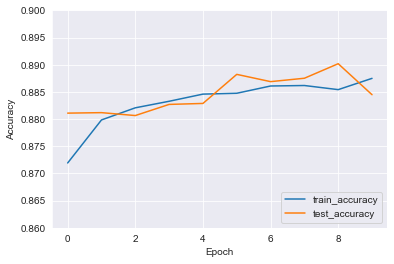

In [ ]:
# visualize the model
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# adjust ylabel range to 0.98 to 1
plt.ylim([0.86, 0.9])

In [ ]:
# load model.vgg16_multi_aug
model_vgg = tf.keras.models.load_model('model.vgg16_multi_aug')

In [ ]:
# make predictions
y_pred = model_vgg.predict(x_test)
# evaluate the model
test_loss, test_acc = model_vgg.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# print traing and testing accuracy
print("Training Accuracy: {:.4f}".format(history.history['accuracy'][-1]))
print("Testing Accuracy: {:.4f}".format(test_acc))

Training Accuracy: 0.8875
Testing Accuracy: 0.8845


(array([  881.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10338.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

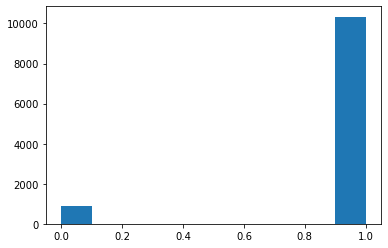

In [ ]:
# round the predictions
y_pred = np.round(y_pred).astype(int)
# histogram of predictions
plt.hist(y_pred)

In [ ]:
# concate y_test and y_pred to pandas dataframe
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
y_test_pred = pd.concat([y_test, y_pred], axis=1)

# show difference between y_test and y_pred
y_test_pred.columns = ['y_test', 'y_pred']
y_test_pred['diff'] = y_test_pred['y_test'] - y_test_pred['y_pred']
y_test_pred.head()

,y_test,y_pred,diff
0,1,1,0
1,0,1,-1
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
# value counts diff
y_test_pred['diff'].value_counts()

 0    9923
-1    1075
 1     221
Name: diff, dtype: int64

Text(0.5, 24.0, 'Predicted label')

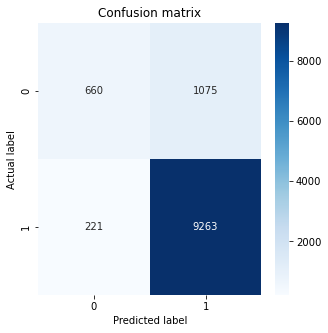

In [ ]:
cm = confusion_matrix(y_test_pred['y_test'], y_test_pred['y_pred'])

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# save the model
model_vgg.save('model.vgg16_multi_aug')

INFO:tensorflow:Assets written to: model.vgg16_multi_aug\assets


INFO:tensorflow:Assets written to: model.vgg16_multi_aug\assets
